In [212]:
import numpy  as np
import os
import glob 
import re
from PIL import Image

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

# 自作データセットの学習

自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

### イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

### osを使用する場合

In [107]:
%pwd

'C:\\Users\\Kei\\diveintocode-ml\\Sprint18'

In [108]:
#os.listdir()でファイル名、ディレクトリ名を取得

path = '../Sprint18/train' 
flist = os.listdir(path)

In [109]:
!ls -a ./training

'ls' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [110]:
flist

['cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg']

In [111]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg']

### globを使用する場合

In [112]:
img_list = glob.glob(path + '/*' + ".jpg")

In [113]:
img_list

['../Sprint18/train\\cat.1.jpg',
 '../Sprint18/train\\cat.2.jpg',
 '../Sprint18/train\\cat.3.jpg',
 '../Sprint18/train\\cat.4.jpg',
 '../Sprint18/train\\cat.5.jpg',
 '../Sprint18/train\\dog.1.jpg',
 '../Sprint18/train\\dog.2.jpg',
 '../Sprint18/train\\dog.3.jpg',
 '../Sprint18/train\\dog.4.jpg',
 '../Sprint18/train\\dog.5.jpg']

### イメージのロード、配列化、リサイズ、データセット作成

In [114]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [115]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


### イメージの出力

In [116]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.80392157, 0.79215686, 0.73333333],
        [0.80392157, 0.79215686, 0.73333333],
        [0.80392157, 0.79215686, 0.73333333],
        ...,
        [0.43137255, 0.2745098 , 0.15686275],
        [0.41176471, 0.23921569, 0.11372549],
        [0.39607843, 0.22745098, 0.10196078]],

       [[0.80392157, 0.79215686, 0.73333333],
        [0.80392157, 0.79215686, 0.73333333],
        [0.80392157, 0.79215686, 0.73333333],
        ...,
        [0.42745098, 0.2745098 , 0.14901961],
        [0.41176471, 0.23921569, 0.11372549],
        [0.39607843, 0.22745098, 0.10196078]],

       [[0.80392157, 0.79215686, 0.73333333],
        [0.80392157, 0.79215686, 0.73333333],
        [0.80392157, 0.79215686, 0.73333333],
        ...,
        [0.42352941, 0.2627451 , 0.13333333],
        [0.41176471, 0.23137255, 0.10588235],
        [0.39607843, 0.21960784, 0.09411765]],

       ...,

       [[0.8627451 , 0.85882353, 0.84313725],
        [0.85882353, 0.85490196, 0.83921569],
        [0.86666667, 0

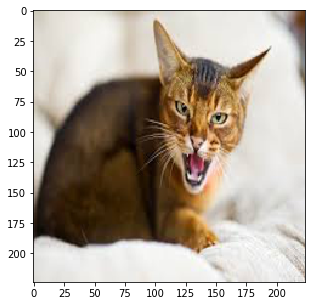

In [117]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [118]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


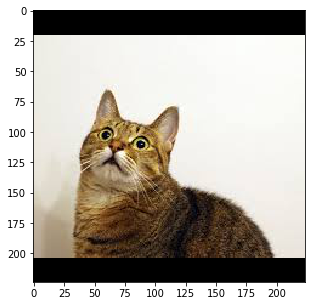

In [119]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

### Kerasでも読み込んでみよう

In [120]:
from keras.preprocessing.image import load_img, img_to_array

In [121]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.90588236, 0.90588236, 0.8666667 ],
        [0.9098039 , 0.9098039 , 0.87058824],
        [0.9098039 , 0.9098039 , 0.87058824],
        ...,
        [0.972549  , 0.972549  , 0.9647059 ],
        [0.96862745, 0.972549  , 0.9411765 ],
        [0.96862745, 0.972549  , 0.9411765 ]],

       [[0.90588236, 0.90588236, 0.8666667 ],
        [0.9098039 , 0.9098039 , 0.87058824],
        [0.9098039 , 0.9098039 , 0.87058824],
        ...,
        [0.972549  , 0.972549  , 0.9647059 ],
        [0.96862745, 0.972549  , 0.9411765 ],
        [0.96862745, 0.972549  , 0.9411765 ]],

       [[0.90588236, 0.90588236, 0.8666667 ],
        [0.9098039 , 0.9098039 , 0.87058824],
        [0.9098039 , 0.9098039 , 0.87058824],
        ...,
        [0.972549  , 0.972549  , 0.9647059 ],
        [0.972549  , 0.9764706 , 0.94509804],
        [0.972549  , 0.9764706 , 0.94509804]],

       ...,

       [[0.7647059 , 0.70980394, 0.65882355],
        [0.7647059 , 0.70980394, 0.65882355],
        [0.7647059 , 0

<class 'PIL.Image.Image'>


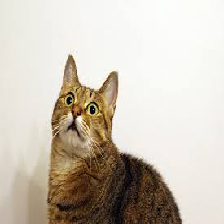

In [122]:
print(type(img_keras))

img_keras

## Resizeについて

In [123]:
import cv2

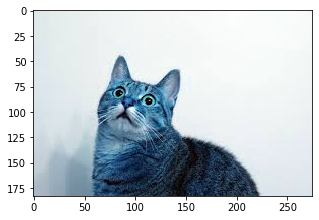

In [124]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

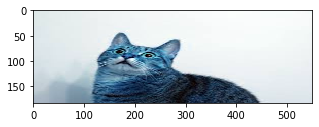

In [125]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

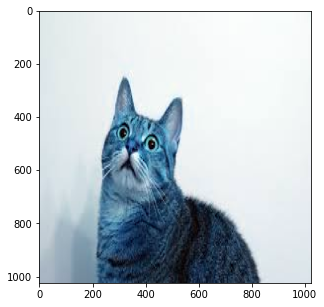

In [126]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

### データの準備

In [170]:
#os.listdir()でファイル名、ディレクトリ名を取得

train_path = '../Sprint18/train' 
test_path = '../Sprint18/test' 

In [171]:
train_img_list = glob.glob(train_path + '/*' + ".jpg")
test_img_list = glob.glob(test_path + '/*' + ".jpg")

In [172]:
train_img_list

['../Sprint18/train\\cat.1.jpg',
 '../Sprint18/train\\cat.2.jpg',
 '../Sprint18/train\\cat.3.jpg',
 '../Sprint18/train\\cat.4.jpg',
 '../Sprint18/train\\cat.5.jpg',
 '../Sprint18/train\\dog.1.jpg',
 '../Sprint18/train\\dog.2.jpg',
 '../Sprint18/train\\dog.3.jpg',
 '../Sprint18/train\\dog.4.jpg',
 '../Sprint18/train\\dog.5.jpg']

In [173]:
test_img_list

['../Sprint18/test\\cat.6.jpg', '../Sprint18/test\\dog.6.jpg']

In [174]:
def data_making(img_list):
    
    # np.resizeはだめ、ぜったい

    #0: dog, 1: cat
    y = []
    X = np.empty((0,224,224,3))

    for img in img_list:

        # ファイル名に'dog'が含まれるイメージ
        if re.search('dog', img):

            dog_img_ = Image.open(img)

            # サイズを揃える
            dog_img_ = dog_img_.resize((224, 224))

            # PIL.Image.Imageからnumpy配列へ
            dog_img = np.array(dog_img_)

            # 正規化
            dog_img = dog_img / 255.

            # axisの追加
            dog_img = dog_img.reshape((1,224,224,3))

            X = np.concatenate([X, dog_img], axis = 0)

            dog_img_.close()

            #ラベルの追加
            y.append(0)

        # ファイル名に'cat'が含まれるイメージ
        if re.search('cat', img):

            cat_img_ = Image.open(img)

            cat_img_ = cat_img_.resize((224, 224))

            cat_img = np.array(cat_img_)

            cat_img = cat_img / 255.

            cat_img = cat_img.reshape((1,224,224,3))

            X = np.concatenate([X, cat_img], axis = 0)

            cat_img_.close()

            #ラベルの追加
            y.append(1)
            
    y = np.array(y)

    return X, y

In [175]:
X_train, y_train = data_making(train_img_list)
print('X_train:{} y_train:{}'.format(X_train.shape, y_train.shape))

X_train:(10, 224, 224, 3) y_train:(10,)


In [176]:
X_test, y_test = data_making(test_img_list)
print('X_test:{} y_test:{}'.format(X_test.shape, y_test.shape))

X_test:(2, 224, 224, 3) y_test:(2,)


### モデルの実装

In [135]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop

In [136]:
def model_making():
    '''
    モデル
    '''
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))   
    
    return model

In [137]:
model = model_making()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

In [138]:
#コンパイル
model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=1e-4), 
             metrics=['accuracy'])

In [139]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
10/10 [==============================] - 19s 2s/step - loss: 1.0547 - accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.9784 - accuracy: 0.4000
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 0.5240 - accuracy: 0.7000
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.6942 - accuracy: 0.6000
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 0.2666 - accuracy: 0.9000


In [140]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.06059823 0.05275976]
y_pred [0 0]
Test loss: 1.428846001625061
Test accuracy: 0.5


In [177]:
def showt_image(X_test, y_test, y_pred):
    label = {0: 'dog', 1: 'cat'}
    for i in range(y_test.shape[0]):
        print('pred : {}, true : {}'.format(label[y_pred[i]], label[y_test[i]]))
        plt.imshow(X_test[i])
        plt.show()

pred : dog, true : cat


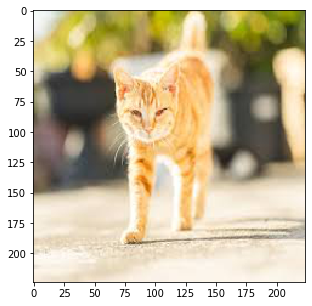

pred : dog, true : dog


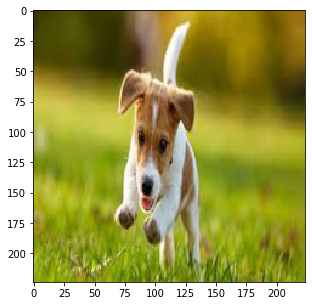

In [178]:
showt_image(X_test, y_test, y_pred)

猫も犬と予測している。

## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。

[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations)


また、Kerasを使う場合はImageDataGeneratorも便利です。

#### 《データ拡張の効果の調査》


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

KerasのImageDataGenerator使い方  
- [Kerasを使用して画像のデータ拡張（回転、拡大・縮小）を行う](https://newtechnologylifestyle.net/keras_imagedatagenerator/  )
- [Keras-画像のラベルと番号を確認する方法](https://betashort-lab.com/%e3%83%87%e3%83%bc%e3%82%bf%e3%82%b5%e3%82%a4%e3%82%a8%e3%83%b3%e3%82%b9/%e3%83%87%e3%82%a3%e3%83%bc%e3%83%97%e3%83%a9%e3%83%bc%e3%83%8b%e3%83%b3%e3%82%b0/flow_from_directory%e3%81%ae%e3%83%a9%e3%83%99%e3%83%ab%e3%81%a8%e7%95%aa%e5%8f%b7%e3%82%92%e5%8f%96%e5%be%97%e3%81%99%e3%82%8b%e6%96%b9%e6%b3%95/)  
- [ImageDataGenerator flow_from_directoryを使い、名前付きでクラスごとのデータを読み込む](http://monisoi.hatenablog.com/entry/2018/05/31/080801)  
- [【Keras】ImageDataGeneratorで画像の水増しをしてみた](https://ymgsapo.com/2019/03/01/keras-image-data-generator/)

albumentationsの使い方  
https://qiita.com/Takayoshi_Makabe/items/79c8a5ba692aa94043f7

albumentationsのインストールがうまくいかなかったのでImageDataGeneratorを使う

In [158]:
from keras.preprocessing.image import ImageDataGenerator

In [159]:
%pwd

'C:\\Users\\Kei\\diveintocode-ml\\Sprint18'

In [161]:
# 分類
classes = ['dog', 'cat']

image_width, image_height = 224, 224

# 重みデータを保存するディレクトリ
result_dir = '.'

# バッチサイズ、エポック数
batch_size = 2
epoch_count = 10

datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


generator_train = datagen.flow_from_directory(directory='train',
                                        target_size = (image_width, image_height),
                                        batch_size = batch_size,
                                        classes = classes, 
                                        class_mode="categorical")

generator_test = datagen.flow_from_directory(directory='test',
                                        target_size = (image_width, image_height),
                                        batch_size = batch_size,
                                        classes = classes, 
                                        class_mode="categorical")

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
data_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [162]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
 
# 入力ディレクトリを作成
input_cat__dir = "cat_train"
cat_files = glob.glob(input_dir + '/*.jpg')

input_dog_dir = "dog_train"
dog_files = glob.glob(input_dir + '/*.jpg')


# 出力ディレクトリを作成
output_dir = "cat_dog_train"
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)

# ImageDataGeneratorの生成
datagen = ImageDataGenerator(rescale = 1./255, 
                             shear_range = 0.2, #シアー強度
                             zoom_range = 0.2, #ランダムにズームする範囲
                             width_shift_range=0.2, #ランダムに水平シフトする範囲
                             height_shift_range=0.2, #ランダムに垂直シフトする範囲
                             horizontal_flip=True #水平方向にランダムに反転
                            ) 
    
for i, file in enumerate(cat_files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # 9個の画像を生成
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='cat', save_format='jpg')
    for i in range(9):
        batch = g.next()
        
for i, file in enumerate(dog_files):
 
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    # 9個の画像を生成します
    g = datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='dog', save_format='jpg')
    for i in range(9):
        batch = g.next()

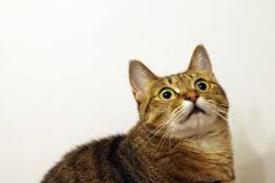

In [214]:
file_name = './cat_dog_train/cat_0_996.jpg'
im = Image.open(file_name)
im

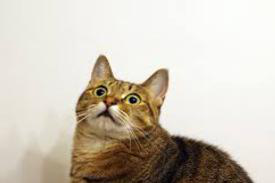

In [213]:
file_name = './cat_dog_train/cat_0_53.jpg'
im = Image.open(file_name)
im

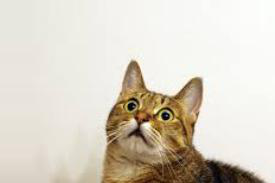

In [215]:
file_name = './cat_dog_train/dog_0_1405.jpg'
im = Image.open(file_name)
im

In [163]:
#os.listdir()でファイル名、ディレクトリ名を取得

train_path = '../Sprint18/cat_dog_train' 
test_path = '../Sprint18/test' 

train_img_list = glob.glob(train_path + '/*' + ".jpg")
test_img_list = glob.glob(test_path + '/*' + ".jpg")

In [164]:
X_train, y_train = data_making(train_img_list)
print('X_train:{} y_train:{}'.format(X_train.shape, y_train.shape))

X_train:(360, 224, 224, 3) y_train:(360,)


In [165]:
X_test, y_test = data_making(test_img_list)
print('X_test:{} y_test:{}'.format(X_test.shape, y_test.shape))

X_test:(2, 224, 224, 3) y_test:(2,)


In [166]:
#学習
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
360/360 [==============================] - 576s 2s/step - loss: 0.7401 - accuracy: 0.5028
Epoch 2/5
360/360 [==============================] - 808s 2s/step - loss: 0.6983 - accuracy: 0.4528
Epoch 3/5
360/360 [==============================] - 571s 2s/step - loss: 0.6958 - accuracy: 0.4778
Epoch 4/5
360/360 [==============================] - 570s 2s/step - loss: 0.6934 - accuracy: 0.4722
Epoch 5/5
360/360 [==============================] - 468s 1s/step - loss: 0.6942 - accuracy: 0.5000


In [167]:
#推定
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

#評価
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_proba [0.49940634 0.499392  ]
y_pred [0 0]
Test loss: 0.6931335926055908
Test accuracy: 0.5


pred : dog, true : cat


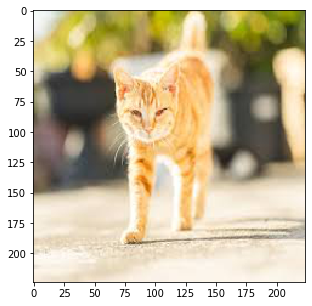

pred : dog, true : dog


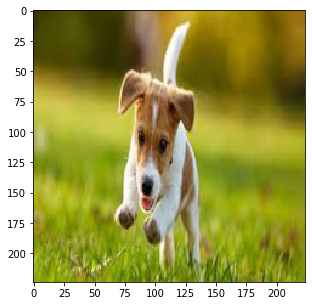

In [169]:
showt_image(X_test, y_test, y_pred)

今回も猫を犬と予測しているが、ロスは前回よりも小さくなっていることが確認できる。

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


#### 《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

[PythonでのXMLファイル操作例](https://qiita.com/sino20023/items/0314438d397240e56576)

In [216]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [217]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    '''
    bounding boxを可視化する関数
    '''
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    '''
    画像を出力する関数
    '''
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [218]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format': 'coco', 'min_area': min_area, 
                                     'min_visibility': min_visibility, 'label_fields': ['category_id']})

In [237]:
image = np.array(Image.open('train/cat.5.jpg'))
print(image.shape)

(183, 275, 3)


In [238]:
import xml.etree.ElementTree as ET

from albumentations import (
    HorizontalFlip, Rotate,Transpose, VerticalFlip, ShiftScaleRotate, Blur,CenterCrop, Compose)

In [239]:
# XMLファイルを解析
tree = ET.parse('train/cat.5.xml') 

# XMLを取得
root = tree.getroot()
bbox = np.array([])

for i in range(4):
    coodinate = int(root[6][4][i].text)
    bbox = np.append(bbox, coodinate)

In [240]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [bbox], 'category_id': [18]}
category_id_to_name = {18: 'dog'}

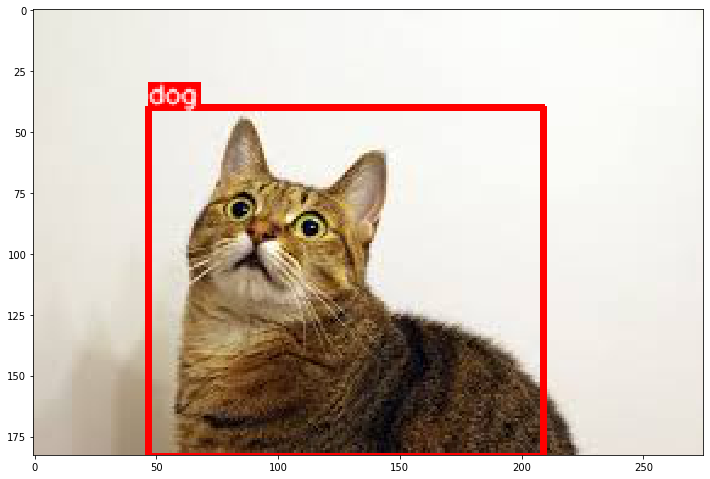

In [241]:
visualize(annotations, category_id_to_name)

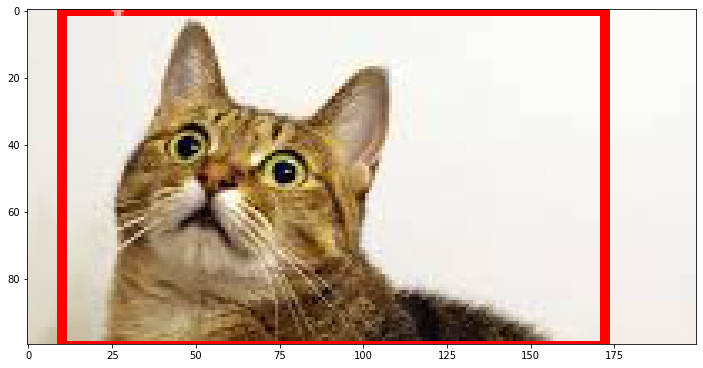

In [243]:
aug = get_aug([CenterCrop(p=1, height=100, width=200)], min_visibility=0.3)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

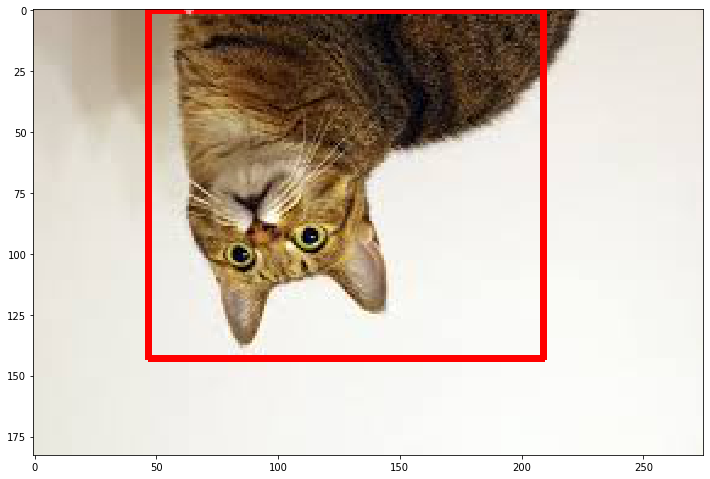

In [244]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)